In [2]:
import logging
from pathlib import Path

import numpy as np
import pandas as pd
import pyvista as pv

from amworkflow.geometry import GeometryCenterline
from amworkflow.meshing import MeshingGmsh

logging.basicConfig(level=logging.INFO)

%load_ext autoreload
%autoreload 2

2024-02-02 10:55:46,069 - root - INFO - point [0. 0. 0.] already exists, return the old one.


# Toy problem for demonstrating the moduls of the AM workflow repo

In [3]:
# initialze parameter dict
params = { }

# define output directory 
OUTPUT_NAME = "toy"
OUTPUT = (
    Path.cwd() / "output_notebook"
) 
OUTPUT.mkdir(parents=True, exist_ok=True)

print(f"result files will be saved in folder: {OUTPUT}")


result files will be saved in folder: /home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook


## 1. Create design by centerline

In [4]:
# set design parameters
params["layer_thickness"] = 20.  # mm
params["height"] = 40.  # mm

# define centerline by points (x,y,z) as list:
# points = [[0., 0., 0.],
#           [0.,150.,0.],
#           [50.,75.,0.],
#           [150.,150.,0.],
#           [150.,0.,0.]]
points = [[0., 0., 0.],
          [0.,150.,0.],
          [150.,150.,0.],
          [150.,0.,0.]]
params["points"] = points

# initialize geometry class
geometry = GeometryCenterline(**params)
# create stp, csv, stl
geometry.create(OUTPUT / f"{OUTPUT_NAME}.stp",  OUTPUT / f"{OUTPUT_NAME}.csv", OUTPUT / f"{OUTPUT_NAME}.stl")

0 2
0 3
0 4
0 5
0 6
0 7
0 8
1 3
1 4
1 5
1 6
1 7
1 8
2 4
2 5
2 6
2 7
2 8
3 5
3 6
3 7
3 8
4 6
4 7
4 8
5 7
5 8
6 8
filtered: []
vote: [0. 0.]
result: [[0, 1, 2, 3], [4, 5, 6, 7]]
[[0, 1, 2, 3], [4, 5, 6, 7]]

*******************************************************************
******        Statistics on Transfer (Write)                 ******

*******************************************************************
******        Transfer Mode = 0  I.E.  As Is       ******
******        Transferring Shape, ShapeType = 2                      ******
** WorkSession : Sending all data
 Step File Name : /home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook/toy.stp(696 ents)  Write  Done


In [5]:
# output:
[f for f in OUTPUT.iterdir() if f.is_file()]

[PosixPath('/home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook/toy.h5'),
 PosixPath('/home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook/toy.csv'),
 PosixPath('/home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook/toy.vtk'),
 PosixPath('/home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook/toy.stl'),
 PosixPath('/home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook/toy.msh'),
 PosixPath('/home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook/toy.xdmf'),
 PosixPath('/home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook/toy.stp')]

2024-02-02 10:55:55,979 - py.warnings - WARNING - /home/araderma/miniconda3/envs/amworkflow/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(



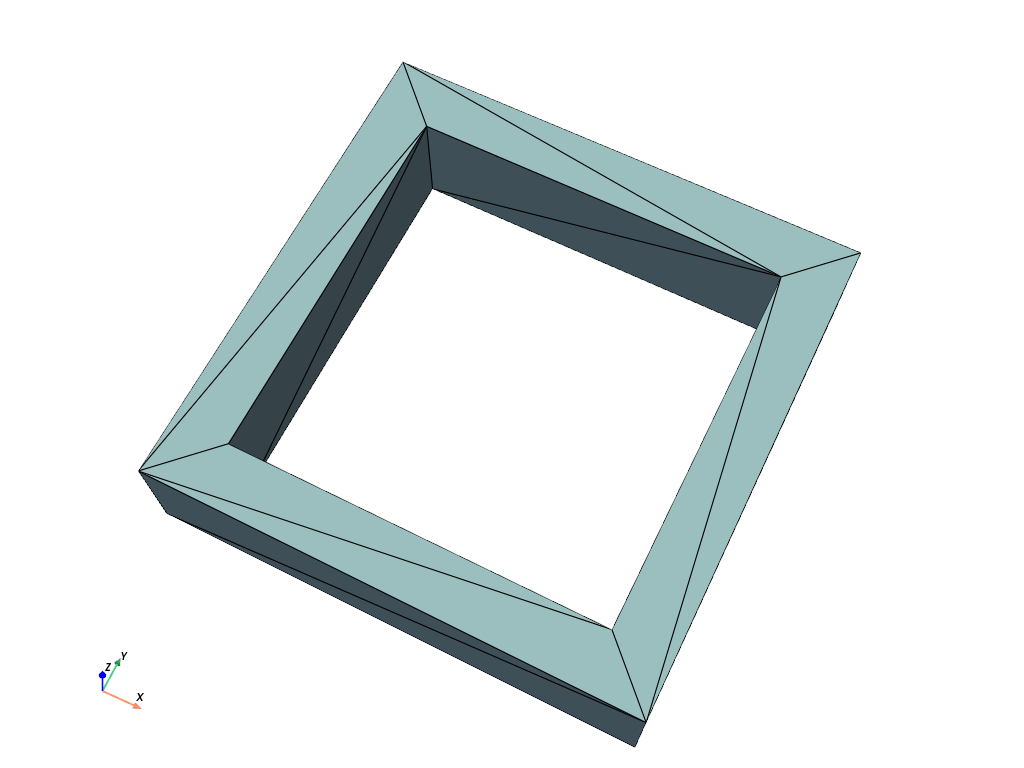

In [6]:
# display stl
mesh = pv.read(OUTPUT / f"{OUTPUT_NAME}.stl")
#mesh.plot(cpos='xy')
mesh.plot(cpos=[1, -2, 5], show_edges=True)

In [7]:
# load saved points:
pd.read_csv(OUTPUT / f"{OUTPUT_NAME}.csv")

,Unnamed: 0,x,y,z
0,0,0.0,0.0,0.0
1,1,0.0,150.0,0.0
2,2,150.0,150.0,0.0
3,3,150.0,0.0,0.0


## 2. Create gcode from points

In [8]:
# define gcode parameters
#params[""]=...

In [9]:
# output:
[f for f in OUTPUT.iterdir() if f.is_file()]

[PosixPath('/home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook/toy.h5'),
 PosixPath('/home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook/toy.csv'),
 PosixPath('/home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook/toy.vtk'),
 PosixPath('/home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook/toy.stl'),
 PosixPath('/home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook/toy.msh'),
 PosixPath('/home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook/toy.xdmf'),
 PosixPath('/home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook/toy.stp')]

## 3. Create mesh from design

In [10]:
# define mesh parameters
params["mesh_size_factor"] = 10
params["number_of_layers"] =  4

meshing = MeshingGmsh(**params)
meshing.create(OUTPUT / f"{OUTPUT_NAME}.stp",OUTPUT / f"{OUTPUT_NAME}.xdmf",OUTPUT / f"{OUTPUT_NAME}.vtk")

Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Line)
Info    : [ 10%] Meshing curve 2 (Line)
Info    : [ 10%] Meshing curve 3 (Line)
Info    : [ 10%] Meshing curve 4 (Line)
Info    : [ 10%] Meshing curve 5 (Line)
Info    : [ 10%] Meshing curve 6 (Line)
Info    : [ 10%] Meshing curve 7 (Line)
Info    : [ 10%] Meshing curve 8 (Line)
Info    : [ 20%] Meshing curve 9 (Line)
Info    : [ 20%] Meshing curve 10 (Line)
Info    : [ 20%] Meshing curve 11 (Line)
Info    : [ 20%] Meshing curve 12 (Line)
Info    : [ 20%] Meshing curve 13 (Line)
Info    : [ 20%] Meshing curve 14 (Line)
Info    : [ 20%] Meshing curve 15 (Line)
Info    : [ 30%] Meshing curve 16 (Line)
Info    : [ 30%] Meshing curve 17 (Line)
Info    : [ 30%] Meshing curve 18 (Line)
Info    : [ 30%] Meshing curve 19 (Line)
Info    : [ 30%] Meshing curve 20 (Line)
Info    : [ 30%] Meshing curve 21 (Line)
Info    : [ 30%] Meshing curve 22 (Line)
Info    : [ 40%] Meshing curve 23 (Line)
Info    : [ 40%] Meshing curve 24 (Line)
I

In [12]:
# output:
[f for f in OUTPUT.iterdir() if f.is_file()]

[PosixPath('/home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook/toy.h5'),
 PosixPath('/home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook/toy.csv'),
 PosixPath('/home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook/toy.vtk'),
 PosixPath('/home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook/toy.stl'),
 PosixPath('/home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook/toy.msh'),
 PosixPath('/home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook/toy.xdmf'),
 PosixPath('/home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook/toy.stp')]

2024-02-02 10:57:58,831 - py.warnings - WARNING - /home/araderma/miniconda3/envs/amworkflow/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(



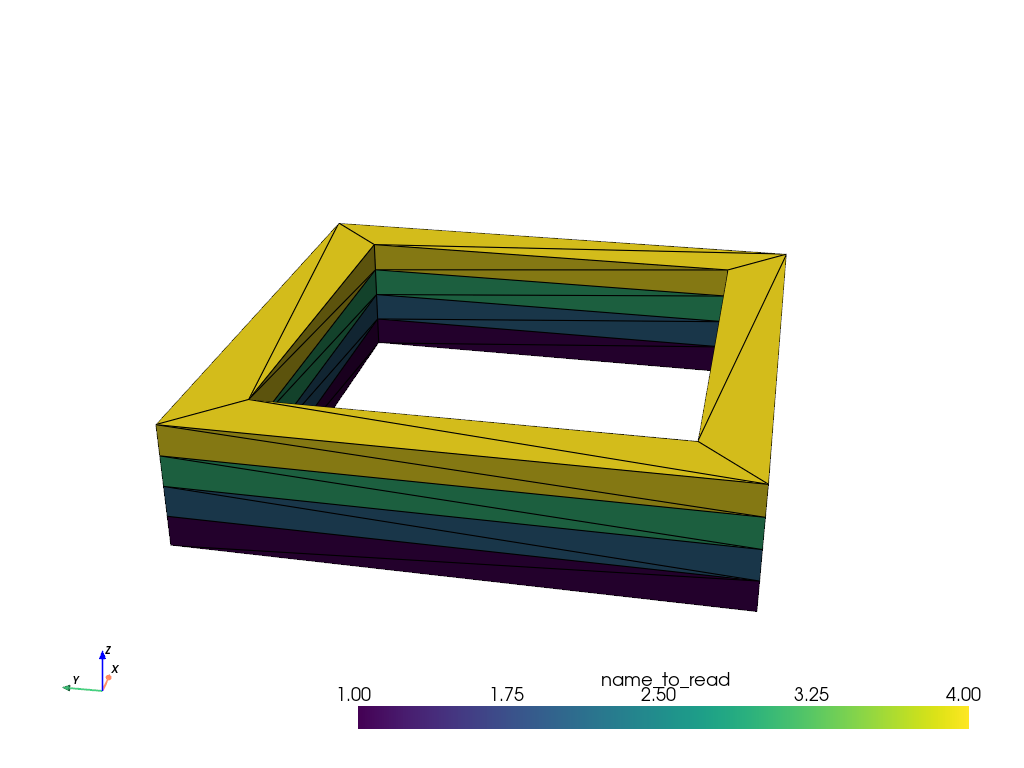

In [19]:
# display vtk
mesh = pv.read(OUTPUT / f"{OUTPUT_NAME}.xdmf")
#mesh.plot(cpos='xz', show_edges=True)
mesh.plot(cpos=[-10, -2, 5], show_edges=True)

## 4. Run simulation